## Transfer Learning -- Use pretrained AlexNet (trained on ImageNet) 
- AlexNet competed in the ImageNet Large Scale Visual Recognition Challenge on September 30, 2012.
- [List of models in pytorch](https://pytorch.org/vision/stable/models.html)

 ``Prepared by Sharib Ali, PhD``

In [1]:
import torch
import torchvision.models as models
alexnet = models.alexnet(pretrained=True)

In [2]:
import numpy as np
from torchvision import transforms 
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [3]:
# Load data and include prepared transform (Remember to apply same transform to both train 
# and test data)
trainset = CIFAR10("data", download=True, train=True, transform=transform)
testset = CIFAR10("data", download=True, train=False, transform=transform)

# labels of CIFAR10 dataset
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Step: Split between train and valset from the overall trainset
from torch.utils.data.sampler import SubsetRandomSampler
val_percentage = 0.1
num_train = len(trainset)

indices = list(range(num_train))
split = int(np.floor(val_percentage * num_train))

train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)


# Now create data loaders (same as before)
# Now we need to create dataLoaders that will allow to iterate during training
batch_size = 64 # create batch-based on how much memory you have and your data size

traindataloader = DataLoader(trainset, batch_size=batch_size, sampler=train_sampler, num_workers=2)
valdataloader = DataLoader(trainset, batch_size=batch_size, sampler=valid_sampler,
            num_workers=2,)

testdataloader = DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [4]:
print('Number of training samples:', len(traindataloader))
print('Number of validation samples:', len(valdataloader))
print('Number of testing samples:', len(testdataloader))

Number of training samples: 704
Number of validation samples: 79
Number of testing samples: 2500
Number of training samples: 704
Number of validation samples: 79
Number of testing samples: 2500


In [5]:
#Model description
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [6]:
#Updating the second classifier (changing last two fully connected layers)
import torch.nn as nn
alexnet.classifier[4] = nn.Linear(4096,1024)
#Updating the third and the last classifier that is the output layer of the network. Make sure to have 10 output nodes if we are going to get 10 class labels through our model.
alexnet.classifier[6] = nn.Linear(1024,10)

In [7]:
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0
cuda:0


In [9]:
# Recall acccuracy calculation
# define accuracy
def topk_accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [10]:
# 1] create your optimiser
import torch.optim as optim
learning_rate = 0.001 # Note: this is an important hyperparameter
model = alexnet.to(device)
optimiser = optim.SGD(model.parameters(), lr = learning_rate,weight_decay=1e-6, momentum = 0.9)
criterion = nn.CrossEntropyLoss()

In [11]:
# Step: Define training function
from torch.utils.tensorboard import SummaryWriter
import time # to check computation time
def train(device, traindataloader, model, criterion, epochs, log_interval, tensorboardLogFile='AlexNet_Retrain'):
    losses_df = {'train_loss' : [], 'train_acc' : [], 'val_loss' : [], 'val_acc' : []}
    print('running on...', device)
    model.to(device)
    model.train() #retrain the entire network
    writer = SummaryWriter()
    
    for epoch in range(epochs):
        start_time = time.time()
        train_loss, valid_loss, train_top1,val_top1  = [], [], [], []
        for batch_idx, (data, label) in enumerate(traindataloader):
            # initialise all your gradients to zero
            optimiser.zero_grad()
            out = model(data.to(device))
            loss = criterion(out, label.to(device))
            loss.backward()
            optimiser.step()

            # append
            train_loss.append(loss.item())
            acc_1 = topk_accuracy(out, label.to(device),topk=(1,))
            train_top1.append(acc_1[0].item())
            


            if (batch_idx % log_interval) == 0:
                print('Train Epoch is: {}, train loss is: {:.6f}, train accuracy top1% is {}'.format(epoch, np.mean(train_loss),
                                                                                               np.mean(train_top1)))

        # every epoch write the loss and accuracy (these you can see plots on tensorboard)  

        
                with torch.no_grad():
                    for i, (data, label) in enumerate(valdataloader):
                        data, label = data.to(device), label.to(device)
                        out = model(data)
                        loss = criterion(out, label.to(device))
                        acc_1 = topk_accuracy(out, label.to(device),topk=(1,))
                        # append
                        valid_loss.append(loss.item())
                        acc_1 = topk_accuracy(out, label.to(device),topk=(1,))
                        val_top1.append(acc_1[0].item())

                print('Val Epoch is: {}, val loss is: {:.6f}, val accuracy top1% is {}'.format(epoch, np.mean(valid_loss),
                                                                                               np.mean(val_top1)))
        writer.add_scalar(tensorboardLogFile+'/train_loss', np.mean(train_loss), epoch)
        writer.add_scalar(tensorboardLogFile+'/train_accuracy', np.mean(train_top1), epoch)
        end_time = time.time()
        print('time taken for epoch{} is {},'.format(epoch, end_time - start_time))
        
        # training loss, val loss and val accuracy
        losses_df['train_loss'].append(np.mean(train_loss))
        losses_df['train_acc'].append(np.mean(train_top1))
        losses_df['val_loss'].append(np.mean(valid_loss))
        losses_df['val_acc'].append(np.mean(val_top1))
              
    print('Finished!')
    return losses_df

In [12]:
# Step: Define test function
def evaluate(model, testdataloader, device):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testdataloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

In [13]:
def accuracyperclass(classes,alexnet,testdataloader, device ):
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}

    # again no gradients needed
    with torch.no_grad():
        for data in testdataloader:
            images, labels = data
            outputs = alexnet(images.to(device))
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label.to(device) == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1


    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                       accuracy))

In [14]:
# set these same for all cases
epochs = 10
log_interval = 100

### CASE-I: Train an entire model: Start training model from scratch (large dataset, more computation)

In [15]:
# re-training of entire model
loss_acc = train(device, traindataloader, model, criterion, epochs, log_interval, tensorboardLogFile='AlexNet_Retrain')

running on... cuda:0
running on... cuda:0
Train Epoch is: 0, train loss is: 2.397424, train accuracy top1% is 14.0625
Train Epoch is: 0, train loss is: 2.397424, train accuracy top1% is 14.0625
Val Epoch is: 0, val loss is: 2.366303, val accuracy top1% is 9.671677215189874
Val Epoch is: 0, val loss is: 2.366303, val accuracy top1% is 9.671677215189874
Train Epoch is: 0, train loss is: 1.319145, train accuracy top1% is 52.629950495049506
Train Epoch is: 0, train loss is: 1.319145, train accuracy top1% is 52.629950495049506
Val Epoch is: 0, val loss is: 1.599565, val accuracy top1% is 40.555775316455694
Val Epoch is: 0, val loss is: 1.599565, val accuracy top1% is 40.555775316455694
Train Epoch is: 0, train loss is: 1.052738, train accuracy top1% is 62.3134328358209
Train Epoch is: 0, train loss is: 1.052738, train accuracy top1% is 62.3134328358209
Val Epoch is: 0, val loss is: 1.311678, val accuracy top1% is 51.747099156118146
Val Epoch is: 0, val loss is: 1.311678, val accuracy top1% 

Train Epoch is: 3, train loss is: 0.329673, train accuracy top1% is 90.625
Train Epoch is: 3, train loss is: 0.329673, train accuracy top1% is 90.625
Val Epoch is: 3, val loss is: 0.453323, val accuracy top1% is 83.93987341772151
Val Epoch is: 3, val loss is: 0.453323, val accuracy top1% is 83.93987341772151
Train Epoch is: 3, train loss is: 0.350864, train accuracy top1% is 87.76299504950495
Train Epoch is: 3, train loss is: 0.350864, train accuracy top1% is 87.76299504950495
Val Epoch is: 3, val loss is: 0.424204, val accuracy top1% is 85.09691455696202
Val Epoch is: 3, val loss is: 0.424204, val accuracy top1% is 85.09691455696202
Train Epoch is: 3, train loss is: 0.344650, train accuracy top1% is 88.02083333333333
Train Epoch is: 3, train loss is: 0.344650, train accuracy top1% is 88.02083333333333
Val Epoch is: 3, val loss is: 0.429000, val accuracy top1% is 85.17273206751055
Val Epoch is: 3, val loss is: 0.429000, val accuracy top1% is 85.17273206751055
Train Epoch is: 3, train l

Train Epoch is: 6, train loss is: 0.302472, train accuracy top1% is 89.0625
Val Epoch is: 6, val loss is: 0.409568, val accuracy top1% is 86.3132911392405
Val Epoch is: 6, val loss is: 0.409568, val accuracy top1% is 86.3132911392405
Train Epoch is: 6, train loss is: 0.255028, train accuracy top1% is 90.96534653465346
Train Epoch is: 6, train loss is: 0.255028, train accuracy top1% is 90.96534653465346
Val Epoch is: 6, val loss is: 0.398864, val accuracy top1% is 86.62974683544304
Val Epoch is: 6, val loss is: 0.398864, val accuracy top1% is 86.62974683544304
Train Epoch is: 6, train loss is: 0.238748, train accuracy top1% is 91.32462686567165
Train Epoch is: 6, train loss is: 0.238748, train accuracy top1% is 91.32462686567165
Val Epoch is: 6, val loss is: 0.378548, val accuracy top1% is 87.17695147679325
Val Epoch is: 6, val loss is: 0.378548, val accuracy top1% is 87.17695147679325
Train Epoch is: 6, train loss is: 0.232320, train accuracy top1% is 91.56457641196013
Train Epoch is: 

Val Epoch is: 9, val loss is: 0.364261, val accuracy top1% is 88.01424050632912
Val Epoch is: 9, val loss is: 0.364261, val accuracy top1% is 88.01424050632912
Train Epoch is: 9, train loss is: 0.143918, train accuracy top1% is 94.84839108910892
Train Epoch is: 9, train loss is: 0.143918, train accuracy top1% is 94.84839108910892
Val Epoch is: 9, val loss is: 0.378395, val accuracy top1% is 87.84612341772151
Val Epoch is: 9, val loss is: 0.378395, val accuracy top1% is 87.84612341772151
Train Epoch is: 9, train loss is: 0.147570, train accuracy top1% is 94.83830845771145
Train Epoch is: 9, train loss is: 0.147570, train accuracy top1% is 94.83830845771145
Val Epoch is: 9, val loss is: 0.378742, val accuracy top1% is 87.96809071729957
Val Epoch is: 9, val loss is: 0.378742, val accuracy top1% is 87.96809071729957
Train Epoch is: 9, train loss is: 0.153268, train accuracy top1% is 94.66881229235881
Train Epoch is: 9, train loss is: 0.153268, train accuracy top1% is 94.66881229235881
Val 

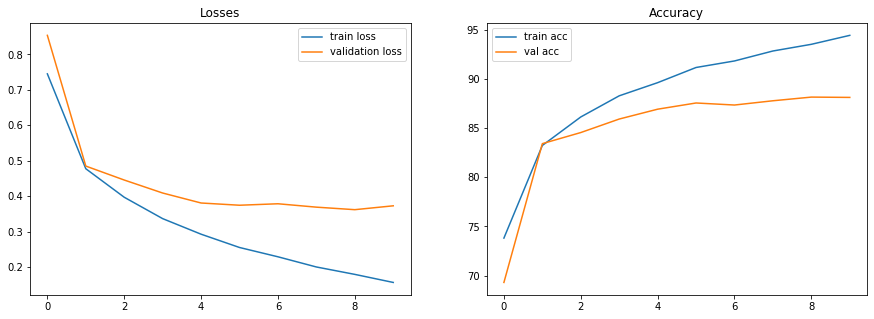

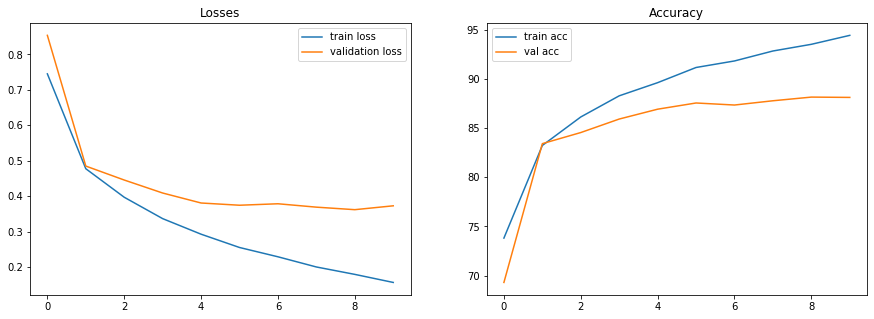

In [16]:
# Plot accuracy and loss for train and val both 
import matplotlib.pyplot as plt
def plot_acc_loss(loss_acc):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    x_range = np.arange(epochs)
    plt.plot(x_range, loss_acc['train_loss'], label = 'train loss')
    plt.plot(x_range, loss_acc['val_loss'], label = 'validation loss')
    plt.title('Losses')
    plt.legend()

    plt.subplot(1,2,2)
    x_range = np.arange(epochs)
    plt.plot(x_range, loss_acc['train_acc'], label = 'train acc')
    plt.plot(x_range, loss_acc['val_acc'], label = 'val acc')
    plt.title('Accuracy')
    plt.legend()
    
plot_acc_loss(loss_acc)

In [17]:
# testing 
evaluate(model, testdataloader, device)

Accuracy of the network on the test images: 87 %
Accuracy of the network on the test images: 87 %


### Case-II: Train some layers and freeze others

In [18]:
alexnet = models.alexnet(pretrained=True)
alexnet.classifier[4] = nn.Linear(4096,1024)
alexnet.classifier[6] = nn.Linear(1024,10)

alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [19]:
# check if its not the same (it has to be poor accuracy)
# accuracyperclass(classes,alexnet.to(device),testdataloader, device)

In [20]:
# display keys
params = alexnet.state_dict()
params.keys()

odict_keys(['features.0.weight', 'features.0.bias', 'features.3.weight', 'features.3.bias', 'features.6.weight', 'features.6.bias', 'features.8.weight', 'features.8.bias', 'features.10.weight', 'features.10.bias', 'classifier.1.weight', 'classifier.1.bias', 'classifier.4.weight', 'classifier.4.bias', 'classifier.6.weight', 'classifier.6.bias'])

odict_keys(['features.0.weight', 'features.0.bias', 'features.3.weight', 'features.3.bias', 'features.6.weight', 'features.6.bias', 'features.8.weight', 'features.8.bias', 'features.10.weight', 'features.10.bias', 'classifier.1.weight', 'classifier.1.bias', 'classifier.4.weight', 'classifier.4.bias', 'classifier.6.weight', 'classifier.6.bias'])

In [21]:
# Select say 6th and 10th conv layer, and second last FC layer
for parameter in alexnet.features[6].parameters():
    parameter.requires_grad = False
for parameter in alexnet.features[10].parameters():
    parameter.requires_grad = False
#FC layer in classifier
for parameter in alexnet.classifier[4].parameters():
    parameter.requires_grad = False

    
# Find total parameters and trainable parameters
total_params = sum(p.numel() for p in alexnet.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in alexnet.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

#update model with new alexnet with frozen layers
model = alexnet.to(device)
optimiser = optim.SGD(model.parameters(), lr = learning_rate,weight_decay=1e-6, momentum = 0.9)
criterion = nn.CrossEntropyLoss()

44,428,106 total parameters.
38,978,762 training parameters.
44,428,106 total parameters.
38,978,762 training parameters.


In [22]:
# copy the model for another case-III (Note otherwise you will have reload the model!)
import copy
model_clone = copy.deepcopy(model)

In [23]:
# Training for nework with few frozen layers
loss_acc = train(device, traindataloader, model, criterion, epochs, log_interval, tensorboardLogFile='AlexNet_Freezefew')

running on... cuda:0
running on... cuda:0
Train Epoch is: 0, train loss is: 2.444719, train accuracy top1% is 12.5
Train Epoch is: 0, train loss is: 2.444719, train accuracy top1% is 12.5
Val Epoch is: 0, val loss is: 2.409260, val accuracy top1% is 10.700158227848101
Val Epoch is: 0, val loss is: 2.409260, val accuracy top1% is 10.700158227848101
Train Epoch is: 0, train loss is: 1.843341, train accuracy top1% is 35.086633663366335
Train Epoch is: 0, train loss is: 1.843341, train accuracy top1% is 35.086633663366335
Val Epoch is: 0, val loss is: 1.831202, val accuracy top1% is 33.15862341772152
Val Epoch is: 0, val loss is: 1.831202, val accuracy top1% is 33.15862341772152
Train Epoch is: 0, train loss is: 1.487728, train accuracy top1% is 47.395833333333336
Train Epoch is: 0, train loss is: 1.487728, train accuracy top1% is 47.395833333333336
Val Epoch is: 0, val loss is: 1.539216, val accuracy top1% is 44.18512658227848
Val Epoch is: 0, val loss is: 1.539216, val accuracy top1% is 

Train Epoch is: 3, train loss is: 0.324423, train accuracy top1% is 89.0625
Train Epoch is: 3, train loss is: 0.324423, train accuracy top1% is 89.0625
Val Epoch is: 3, val loss is: 0.514951, val accuracy top1% is 82.1004746835443
Val Epoch is: 3, val loss is: 0.514951, val accuracy top1% is 82.1004746835443
Train Epoch is: 3, train loss is: 0.467443, train accuracy top1% is 84.03465346534654
Train Epoch is: 3, train loss is: 0.467443, train accuracy top1% is 84.03465346534654
Val Epoch is: 3, val loss is: 0.498476, val accuracy top1% is 82.96083860759494
Val Epoch is: 3, val loss is: 0.498476, val accuracy top1% is 82.96083860759494
Train Epoch is: 3, train loss is: 0.470383, train accuracy top1% is 83.88526119402985
Train Epoch is: 3, train loss is: 0.470383, train accuracy top1% is 83.88526119402985
Val Epoch is: 3, val loss is: 0.513331, val accuracy top1% is 82.4367088607595
Val Epoch is: 3, val loss is: 0.513331, val accuracy top1% is 82.4367088607595
Train Epoch is: 3, train los

Train Epoch is: 6, train loss is: 0.370203, train accuracy top1% is 85.9375
Val Epoch is: 6, val loss is: 0.434248, val accuracy top1% is 84.73101265822785
Val Epoch is: 6, val loss is: 0.434248, val accuracy top1% is 84.73101265822785
Train Epoch is: 6, train loss is: 0.350303, train accuracy top1% is 88.16522277227723
Train Epoch is: 6, train loss is: 0.350303, train accuracy top1% is 88.16522277227723
Val Epoch is: 6, val loss is: 0.427654, val accuracy top1% is 85.34414556962025
Val Epoch is: 6, val loss is: 0.427654, val accuracy top1% is 85.34414556962025
Train Epoch is: 6, train loss is: 0.355313, train accuracy top1% is 87.79539800995025
Train Epoch is: 6, train loss is: 0.355313, train accuracy top1% is 87.79539800995025
Val Epoch is: 6, val loss is: 0.418198, val accuracy top1% is 85.54193037974683
Val Epoch is: 6, val loss is: 0.418198, val accuracy top1% is 85.54193037974683
Train Epoch is: 6, train loss is: 0.351710, train accuracy top1% is 88.01391196013289
Train Epoch is

Val Epoch is: 9, val loss is: 0.397989, val accuracy top1% is 86.62974683544304
Val Epoch is: 9, val loss is: 0.397989, val accuracy top1% is 86.62974683544304
Train Epoch is: 9, train loss is: 0.283643, train accuracy top1% is 90.08353960396039
Train Epoch is: 9, train loss is: 0.283643, train accuracy top1% is 90.08353960396039
Val Epoch is: 9, val loss is: 0.400056, val accuracy top1% is 86.25395569620254
Val Epoch is: 9, val loss is: 0.400056, val accuracy top1% is 86.25395569620254
Train Epoch is: 9, train loss is: 0.282036, train accuracy top1% is 90.2207711442786
Train Epoch is: 9, train loss is: 0.282036, train accuracy top1% is 90.2207711442786
Val Epoch is: 9, val loss is: 0.402753, val accuracy top1% is 86.24736286919831
Val Epoch is: 9, val loss is: 0.402753, val accuracy top1% is 86.24736286919831
Train Epoch is: 9, train loss is: 0.287029, train accuracy top1% is 89.96054817275747
Train Epoch is: 9, train loss is: 0.287029, train accuracy top1% is 89.96054817275747
Val Ep

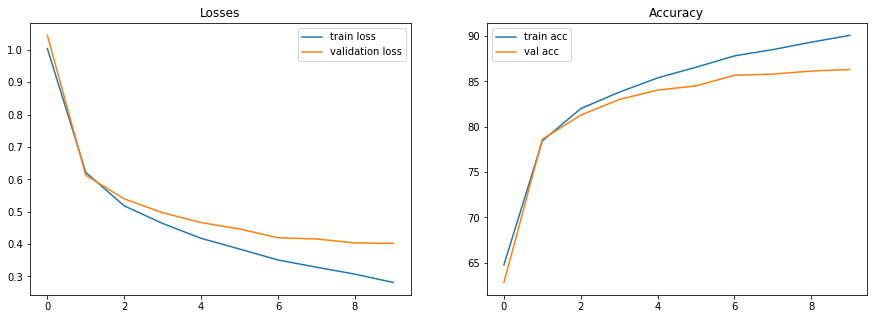

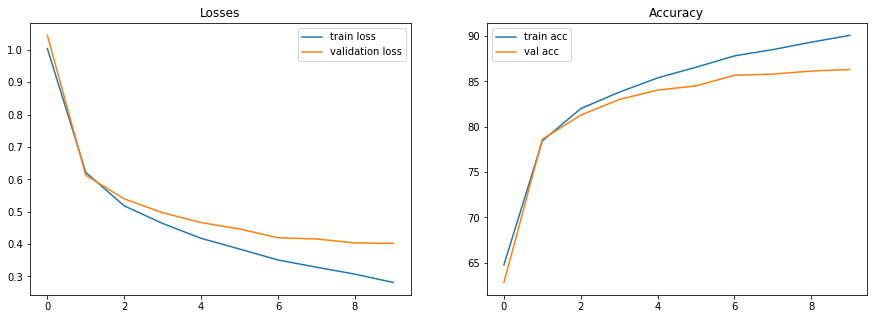

In [24]:
plot_acc_loss(loss_acc)

In [25]:
# testing 
evaluate(model, testdataloader, device)

Accuracy of the network on the test images: 85 %
Accuracy of the network on the test images: 85 %


### Case-III: Freeze convolution base and train only last FC layers (small dataset and lower computation)

In [26]:
params = alexnet.state_dict()
params.keys()

odict_keys(['features.0.weight', 'features.0.bias', 'features.3.weight', 'features.3.bias', 'features.6.weight', 'features.6.bias', 'features.8.weight', 'features.8.bias', 'features.10.weight', 'features.10.bias', 'classifier.1.weight', 'classifier.1.bias', 'classifier.4.weight', 'classifier.4.bias', 'classifier.6.weight', 'classifier.6.bias'])

odict_keys(['features.0.weight', 'features.0.bias', 'features.3.weight', 'features.3.bias', 'features.6.weight', 'features.6.bias', 'features.8.weight', 'features.8.bias', 'features.10.weight', 'features.10.bias', 'classifier.1.weight', 'classifier.1.bias', 'classifier.4.weight', 'classifier.4.bias', 'classifier.6.weight', 'classifier.6.bias'])

In [27]:
for param in model_clone.parameters():
    param.requires_grad = False

# Unfreeze last classifier layers
for parameter in alexnet.classifier[1].parameters():
    parameter.requires_grad = True
for parameter in model_clone.classifier[4].parameters():
    parameter.requires_grad = True
for parameter in model_clone.classifier[6].parameters():
    parameter.requires_grad = True

In [28]:
# Find total parameters and trainable parameters
total_params = sum(p.numel() for p in model_clone.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in model_clone.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

44,428,106 total parameters.
4,205,578 training parameters.
44,428,106 total parameters.
4,205,578 training parameters.


In [29]:
# training -- check time
# fine tuning only FC layers, frozen conv layers
model = model_clone.to(device)
optimiser = optim.SGD(model.parameters(), lr = learning_rate,weight_decay=1e-6, momentum = 0.9)
criterion = nn.CrossEntropyLoss()

optimiser = optim.SGD(model.parameters(), lr = learning_rate,weight_decay=1e-6, momentum = 0.9)
loss_acc = train(device, traindataloader, model, criterion, epochs, log_interval, tensorboardLogFile='AlexNet_FinetunelastLayers')

running on... cuda:0
running on... cuda:0
Train Epoch is: 0, train loss is: 2.444496, train accuracy top1% is 14.0625
Train Epoch is: 0, train loss is: 2.444496, train accuracy top1% is 14.0625
Val Epoch is: 0, val loss is: 2.396492, val accuracy top1% is 11.39240506329114
Val Epoch is: 0, val loss is: 2.396492, val accuracy top1% is 11.39240506329114
Train Epoch is: 0, train loss is: 1.445622, train accuracy top1% is 51.48514851485149
Train Epoch is: 0, train loss is: 1.445622, train accuracy top1% is 51.48514851485149
Val Epoch is: 0, val loss is: 1.693352, val accuracy top1% is 38.350474683544306
Val Epoch is: 0, val loss is: 1.693352, val accuracy top1% is 38.350474683544306
Train Epoch is: 0, train loss is: 1.190600, train accuracy top1% is 59.42164179104478
Train Epoch is: 0, train loss is: 1.190600, train accuracy top1% is 59.42164179104478
Val Epoch is: 0, val loss is: 1.406346, val accuracy top1% is 49.23523206751055
Val Epoch is: 0, val loss is: 1.406346, val accuracy top1% i

Train Epoch is: 3, train loss is: 0.552950, train accuracy top1% is 81.25
Val Epoch is: 3, val loss is: 0.655145, val accuracy top1% is 77.5118670886076
Val Epoch is: 3, val loss is: 0.655145, val accuracy top1% is 77.5118670886076
Train Epoch is: 3, train loss is: 0.638151, train accuracy top1% is 77.45977722772277
Train Epoch is: 3, train loss is: 0.638151, train accuracy top1% is 77.45977722772277
Val Epoch is: 3, val loss is: 0.658267, val accuracy top1% is 77.16574367088607
Val Epoch is: 3, val loss is: 0.658267, val accuracy top1% is 77.16574367088607
Train Epoch is: 3, train loss is: 0.640327, train accuracy top1% is 77.25435323383084
Train Epoch is: 3, train loss is: 0.640327, train accuracy top1% is 77.25435323383084
Val Epoch is: 3, val loss is: 0.653374, val accuracy top1% is 77.52505274261604
Val Epoch is: 3, val loss is: 0.653374, val accuracy top1% is 77.52505274261604
Train Epoch is: 3, train loss is: 0.641110, train accuracy top1% is 77.1438953488372
Train Epoch is: 3, 

Val Epoch is: 6, val loss is: 0.624540, val accuracy top1% is 78.71835443037975
Val Epoch is: 6, val loss is: 0.624540, val accuracy top1% is 78.71835443037975
Train Epoch is: 6, train loss is: 0.618393, train accuracy top1% is 78.55816831683168
Train Epoch is: 6, train loss is: 0.618393, train accuracy top1% is 78.55816831683168
Val Epoch is: 6, val loss is: 0.625055, val accuracy top1% is 78.26344936708861
Val Epoch is: 6, val loss is: 0.625055, val accuracy top1% is 78.26344936708861
Train Epoch is: 6, train loss is: 0.601630, train accuracy top1% is 78.76243781094527
Train Epoch is: 6, train loss is: 0.601630, train accuracy top1% is 78.76243781094527
Val Epoch is: 6, val loss is: 0.628883, val accuracy top1% is 78.3293776371308
Val Epoch is: 6, val loss is: 0.628883, val accuracy top1% is 78.3293776371308
Train Epoch is: 6, train loss is: 0.599923, train accuracy top1% is 78.82578903654485
Train Epoch is: 6, train loss is: 0.599923, train accuracy top1% is 78.82578903654485
Val Ep

Train Epoch is: 9, train loss is: 0.552151, train accuracy top1% is 80.7240099009901
Train Epoch is: 9, train loss is: 0.552151, train accuracy top1% is 80.7240099009901
Val Epoch is: 9, val loss is: 0.611470, val accuracy top1% is 78.56012658227849
Val Epoch is: 9, val loss is: 0.611470, val accuracy top1% is 78.56012658227849
Train Epoch is: 9, train loss is: 0.566853, train accuracy top1% is 80.01399253731343
Train Epoch is: 9, train loss is: 0.566853, train accuracy top1% is 80.01399253731343
Val Epoch is: 9, val loss is: 0.608504, val accuracy top1% is 78.65242616033755
Val Epoch is: 9, val loss is: 0.608504, val accuracy top1% is 78.65242616033755
Train Epoch is: 9, train loss is: 0.565509, train accuracy top1% is 79.97300664451828
Train Epoch is: 9, train loss is: 0.565509, train accuracy top1% is 79.97300664451828
Val Epoch is: 9, val loss is: 0.601240, val accuracy top1% is 78.95075158227849
Val Epoch is: 9, val loss is: 0.601240, val accuracy top1% is 78.95075158227849
Train 

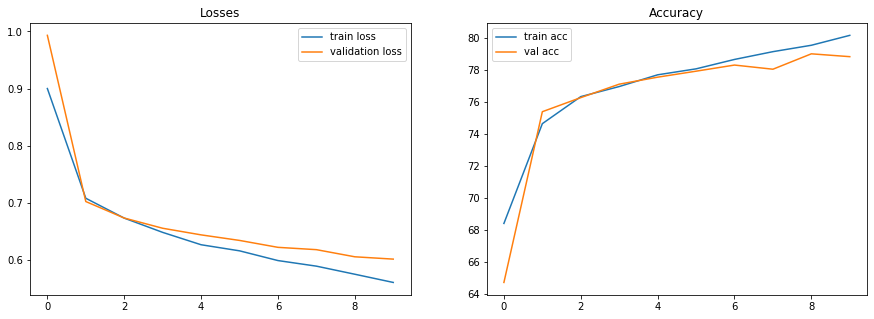

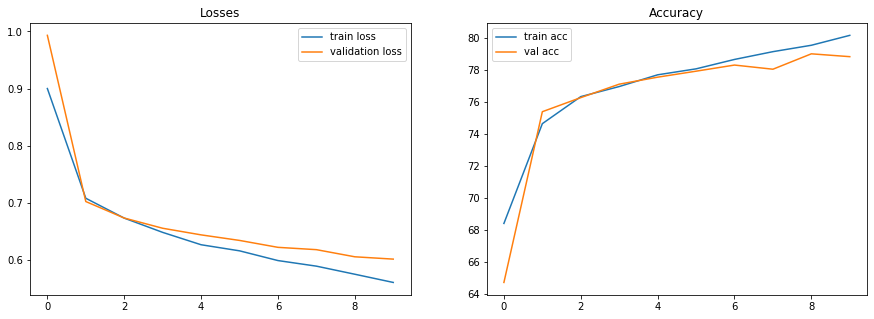

In [30]:
plot_acc_loss(loss_acc)

In [31]:
# testing 
evaluate(model, testdataloader, device)

Accuracy of the network on the test images: 78 %
Accuracy of the network on the test images: 78 %


#### Add diffferent domain images (e.g. medical images) and check what happens

- If you have large data then use **case I**
- If you have small data then use **case II or III**

<h3>Try different combination, have fun playing...</h3>

Comments and feedback to: [Sharib Ali](sharib.ali@eng.ox.ac.uk)